In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import os
from sklearn.model_selection import train_test_split

In [ ]:
file = '/content/collegePlace.csv'
df = pd.read_csv('/content/collegePlace.csv')

In [ ]:
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [ ]:
df.shape

(2966, 8)

In [ ]:
columns = df.columns.values
columns

array(['Age', 'Gender', 'Stream', 'Internships', 'CGPA', 'Hostel',
       'HistoryOfBacklogs', 'PlacedOrNot'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [ ]:
df[['Gender', 'PlacedOrNot']].groupby(['Gender'], as_index=False).mean().sort_values(by='PlacedOrNot', ascending=False)

,Gender,PlacedOrNot
0,Female,0.560081
1,Male,0.551111


In [ ]:
df[['CGPA', 'PlacedOrNot']].groupby(['CGPA'], as_index=False).mean().sort_values(by='PlacedOrNot', ascending=False)

,CGPA,PlacedOrNot
3,8,1.000000
4,9,1.000000
1,6,0.323741
2,7,0.294979
0,5,0.072917


In [ ]:
stream_wise = df.groupby('Stream').agg({'Age':'mean',
                                          'Internships' : 'sum',                            
                                           "CGPA":'mean',                               
                                           "HistoryOfBacklogs" : 'mean',
                                           'PlacedOrNot':'sum'})
stream_wise

,Age,Internships,CGPA,HistoryOfBacklogs,PlacedOrNot
Stream,,,,,
Civil,21.441640,173,7.094637,0.164038,146
Computer Science,21.559278,676,7.039948,0.172680,452
Electrical,21.299401,203,7.080838,0.245509,181
Electronics And Communication,21.410377,306,7.125000,0.257075,251
Information Technology,21.539797,509,7.073806,0.159190,409
Mechanical,21.518868,220,7.063679,0.195755,200


In [ ]:
df[['Internships', 'PlacedOrNot']].groupby(['Internships'], as_index=False).mean().sort_values(by='PlacedOrNot', ascending=False)

,Internships,PlacedOrNot
2,2,0.805714
3,3,0.803922
1,1,0.536467
0,0,0.491360


In [ ]:
df[['Hostel', 'PlacedOrNot']].groupby(['Hostel'], as_index=False).sum().sort_values(by='PlacedOrNot', ascending=False)

,Hostel,PlacedOrNot
0,0,1223
1,1,416


In [ ]:
px.bar(data_frame=stream_wise, barmode='group',title = "<b>Stream wise Analyzing</b>")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [ ]:
dummy_stream = pd.get_dummies(df['Stream'])

In [ ]:
df = pd.concat([df.drop(["Stream"], axis = 1), dummy_stream], axis = 1)

In [ ]:
df.head()

,Age,Gender,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot,Civil,Computer Science,Electrical,Electronics And Communication,Information Technology,Mechanical
0,22,Male,1,8,1,1,1,0,0,0,1,0,0
1,21,Female,0,7,1,1,1,0,1,0,0,0,0
2,22,Female,1,6,0,0,1,0,0,0,0,1,0
3,21,Male,0,8,0,1,1,0,0,0,0,1,0
4,22,Male,0,8,1,0,1,0,0,0,0,0,1


In [ ]:
df['Gender'] = df['Gender'].replace(to_replace=['Male', 'Female'], value=[0,1])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Age                            2966 non-null   int64
 1   Gender                         2966 non-null   int64
 2   Internships                    2966 non-null   int64
 3   CGPA                           2966 non-null   int64
 4   Hostel                         2966 non-null   int64
 5   HistoryOfBacklogs              2966 non-null   int64
 6   PlacedOrNot                    2966 non-null   int64
 7   Civil                          2966 non-null   uint8
 8   Computer Science               2966 non-null   uint8
 9   Electrical                     2966 non-null   uint8
 10  Electronics And Communication  2966 non-null   uint8
 11  Information Technology         2966 non-null   uint8
 12  Mechanical                     2966 non-null   uint8
dtypes: int64(7), uint8

In [ ]:
df['AgeBand'] = pd.cut(df['Age'], 5)
df[['AgeBand', 'PlacedOrNot']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,PlacedOrNot
0,"(18.989, 21.2]",0.562229
1,"(21.2, 23.4]",0.495599
2,"(23.4, 25.6]",0.787500
3,"(25.6, 27.8]",0.740000
4,"(27.8, 30.0]",1.000000


In [ ]:
df.loc[(df['Age'] > 18) & (df['Age'] <= 21), 'Age'] = 0
df.loc[(df['Age'] > 21) & (df['Age'] <= 23), 'Age'] = 1
df.loc[(df['Age'] > 23) & (df['Age'] <= 25), 'Age'] = 2
df.loc[(df['Age'] > 25) & (df['Age'] <= 27), 'Age'] = 3
df.loc[(df['Age'] > 27), 'Age'] = 4

In [ ]:
df.head()

,Age,Gender,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot,Civil,Computer Science,Electrical,Electronics And Communication,Information Technology,Mechanical,AgeBand
0,1,0,1,8,1,1,1,0,0,0,1,0,0,"(21.2, 23.4]"
1,0,1,0,7,1,1,1,0,1,0,0,0,0,"(18.989, 21.2]"
2,1,1,1,6,0,0,1,0,0,0,0,1,0,"(21.2, 23.4]"
3,0,0,0,8,0,1,1,0,0,0,0,1,0,"(18.989, 21.2]"
4,1,0,0,8,1,0,1,0,0,0,0,0,1,"(21.2, 23.4]"


In [ ]:
y = df['PlacedOrNot']

In [ ]:
X = df.drop(['PlacedOrNot','AgeBand'], axis=1)

In [ ]:
X

,Age,Gender,Internships,CGPA,Hostel,HistoryOfBacklogs,Civil,Computer Science,Electrical,Electronics And Communication,Information Technology,Mechanical
0,1,0,1,8,1,1,0,0,0,1,0,0
1,0,1,0,7,1,1,0,1,0,0,0,0
2,1,1,1,6,0,0,0,0,0,0,1,0
3,0,0,0,8,0,1,0,0,0,0,1,0
4,1,0,0,8,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2961,1,0,0,7,0,0,0,0,0,0,1,0
2962,1,0,1,7,1,0,0,0,0,0,0,1
2963,1,0,1,7,0,0,0,0,0,0,1,0
2964,1,0,1,7,0,0,0,1,0,0,0,0


In [ ]:
y

0       1
1       1
2       1
3       1
4       1
       ..
2961    0
2962    0
2963    0
2964    0
2965    1
Name: PlacedOrNot, Length: 2966, dtype: int64

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,Age,Gender,Internships,CGPA,Hostel,HistoryOfBacklogs,Civil,Computer Science,Electrical,Electronics And Communication,Information Technology,Mechanical
2458,0,0,1,8,1,0,0,0,0,0,0,1
509,0,0,0,7,0,0,0,0,0,0,1,0
1370,0,0,0,7,0,1,0,0,0,0,1,0
1352,3,0,1,7,0,0,0,1,0,0,0,0
1779,1,0,1,8,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1638,1,0,3,8,0,0,0,1,0,0,0,0
1095,1,0,1,6,0,0,0,1,0,0,0,0
1130,1,1,1,8,0,0,1,0,0,0,0,0
1294,1,0,0,7,0,0,0,1,0,0,0,0


In [ ]:
X_test

,Age,Gender,Internships,CGPA,Hostel,HistoryOfBacklogs,Civil,Computer Science,Electrical,Electronics And Communication,Information Technology,Mechanical
2395,0,0,0,7,0,1,0,0,0,0,1,0
794,1,0,2,8,0,1,0,1,0,0,0,0
1894,0,0,1,8,0,0,0,0,0,0,1,0
332,1,0,0,7,0,0,0,0,0,1,0,0
2023,0,0,1,7,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1938,1,1,1,8,1,1,0,1,0,0,0,0
2607,0,0,0,8,0,0,0,0,0,0,1,0
1395,1,0,0,7,1,1,0,0,0,0,0,1
602,0,0,2,7,0,0,0,1,0,0,0,0


In [ ]:
y_train

2458    1
509     0
1370    0
1352    1
1779    1
       ..
1638    1
1095    0
1130    1
1294    0
860     0
Name: PlacedOrNot, Length: 2372, dtype: int64

In [ ]:
models_accuracy = {}
cv = KFold(n_splits=15, random_state=13, shuffle=True)

In [ ]:
logr = LogisticRegression(solver='liblinear')
logr.fit(X_train, y_train)
logr_score = logr.score(X_test, y_test)
models_accuracy['Logistic Regression'] = logr_score*100

logr_score*100

71.38047138047138

In [ ]:
X_test

,Age,Gender,Internships,CGPA,Hostel,HistoryOfBacklogs,Civil,Computer Science,Electrical,Electronics And Communication,Information Technology,Mechanical
2395,0,0,0,7,0,1,0,0,0,0,1,0
794,1,0,2,8,0,1,0,1,0,0,0,0
1894,0,0,1,8,0,0,0,0,0,0,1,0
332,1,0,0,7,0,0,0,0,0,1,0,0
2023,0,0,1,7,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1938,1,1,1,8,1,1,0,1,0,0,0,0
2607,0,0,0,8,0,0,0,0,0,0,1,0
1395,1,0,0,7,1,1,0,0,0,0,0,1
602,0,0,2,7,0,0,0,1,0,0,0,0


In [ ]:
logr.predict(X_test)

array([0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,

In [ ]:
y_test

2395    0
794     1
1894    1
332     0
2023    0
       ..
1938    1
2607    1
1395    0
602     1
2308    1
Name: PlacedOrNot, Length: 594, dtype: int64

In [ ]:
svm_model = SVC(decision_function_shape='ovr')
svm_model.fit(X_train, y_train)
svm_score = svm_model.score(X_test, y_test)

models_accuracy['SVM'] = svm_score*100

svm_score*100

84.17508417508418

In [ ]:
kn_model = KNeighborsClassifier(n_neighbors=15)
kn_model.fit(X_train, y_train)
kn_score = kn_model.score(X_test, y_test)
models_accuracy['Knn'] = kn_score*100

kn_score*100

87.87878787878788

In [ ]:
ran_model = RandomForestClassifier(n_estimators = 40)
ran_model.fit(X_train, y_train)
ran_score = ran_model.score(X_test, y_test)
models_accuracy['RanForest'] = ran_score*100

ran_score*100

88.72053872053873

In [ ]:
X_test

,Age,Gender,Internships,CGPA,Hostel,HistoryOfBacklogs,Civil,Computer Science,Electrical,Electronics And Communication,Information Technology,Mechanical
2395,0,0,0,7,0,1,0,0,0,0,1,0
794,1,0,2,8,0,1,0,1,0,0,0,0
1894,0,0,1,8,0,0,0,0,0,0,1,0
332,1,0,0,7,0,0,0,0,0,1,0,0
2023,0,0,1,7,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1938,1,1,1,8,1,1,0,1,0,0,0,0
2607,0,0,0,8,0,0,0,0,0,0,1,0
1395,1,0,0,7,1,1,0,0,0,0,0,1
602,0,0,2,7,0,0,0,1,0,0,0,0


In [ ]:
ran_model.predict(X_test)

array([0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,

In [ ]:
y_test

2395    0
794     1
1894    1
332     0
2023    0
       ..
1938    1
2607    1
1395    0
602     1
2308    1
Name: PlacedOrNot, Length: 594, dtype: int64

In [ ]:
ada_model = AdaBoostClassifier()
ada_model.fit(X_train, y_train)
ada_score = ada_model.score(X_test, y_test)
models_accuracy['AdaBoost'] = ada_score*100

ada_score*100

87.37373737373737

In [ ]:
grad_model = GradientBoostingClassifier()
grad_model.fit(X_train, y_train)
grad_score = grad_model.score(X_test, y_test)
models_accuracy['AdaBoost'] = grad_score*100

grad_score*100

88.38383838383838

In [ ]:
models_accuracy

{'Logistic Regression': 71.38047138047138,
 'SVM': 84.17508417508418,
 'Knn': 87.87878787878788,
 'RanForest': 88.72053872053873,
 'AdaBoost': 88.38383838383838}

In [ ]:
data = {'Accuracy':models_accuracy}
graph_df = pd.DataFrame(data)
graph_df

,Accuracy
AdaBoost,88.383838
Knn,87.878788
Logistic Regression,71.380471
RanForest,88.720539
SVM,84.175084


In [ ]:
pred = ran_model.predict(X_test)

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       280
           1       0.93      0.85      0.89       314

    accuracy                           0.89       594
   macro avg       0.89      0.89      0.89       594
weighted avg       0.89      0.89      0.89       594



In [ ]:
cmat = confusion_matrix(y_test,pred)
print('TN - True Negative {}'.format(cmat[0,0]))
print('FP - False Positive {}'.format(cmat[0,1]))
print('FN - False Negative {}'.format(cmat[1,0]))
print('TP - True Positive {}'.format(cmat[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[0,1],cmat[1,0]]),np.sum(cmat))))

TN - True Negative 260
FP - False Positive 20
FN - False Negative 47
TP - True Positive 267
Accuracy Rate: 0.8872053872053872
Misclassification Rate: 0.1127946127946128


In [ ]:
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

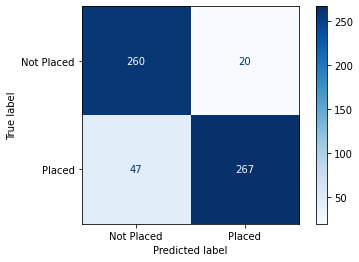

In [ ]:
plot_confusion_matrix(ran_model,
                      X_test, y_test,
                      cmap = plt.cm.Blues,
                      display_labels = ['Not Placed', 'Placed'])
plt.grid(False)
plt.show();

In [ ]:
#trying catboost classifier to check if we can get more accuracy

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
acc = accuracy_score(y_test, pred)
acc= acc*100
acc

88.72053872053873